In [3]:
import json
import re
from pathlib import Path

import pandas as pd

## Fichiers

In [5]:
data_dir = Path.cwd()
basin_file = "bassin_versant_info.txt"
param_file = "parametres.txt"
meteo_file = "meteo_file.csv"

## Bassin versant

In [6]:
for p in Path.iterdir(data_dir):
    print(p)

/mnt/automountdir/gpfs/home/dm9657/Dev/hsamiplus/data/hsami_py_mat.ipynb
/mnt/automountdir/gpfs/home/dm9657/Dev/hsamiplus/data/input_bassin1045_20250204.json
/mnt/automountdir/gpfs/home/dm9657/Dev/hsamiplus/data/projet.json
/mnt/automountdir/gpfs/home/dm9657/Dev/hsamiplus/data/hsami_model_input.ipynb
/mnt/automountdir/gpfs/home/dm9657/Dev/hsamiplus/data/projet_exemple.json
/mnt/automountdir/gpfs/home/dm9657/Dev/hsamiplus/data/projet_20241107.json
/mnt/automountdir/gpfs/home/dm9657/Dev/hsamiplus/data/hasmi_data_20241025.json
/mnt/automountdir/gpfs/home/dm9657/Dev/hsamiplus/data/parametres.txt
/mnt/automountdir/gpfs/home/dm9657/Dev/hsamiplus/data/bassin_versant_info.txt
/mnt/automountdir/gpfs/home/dm9657/Dev/hsamiplus/data/meteo_file.csv
/mnt/automountdir/gpfs/home/dm9657/Dev/hsamiplus/data/Bassin1014_mdj_projet.json
/mnt/automountdir/gpfs/home/dm9657/Dev/hsamiplus/data/output_04-Feb-2025.json
/mnt/automountdir/gpfs/home/dm9657/Dev/hsamiplus/data/hsami_model_output.ipynb


In [7]:
with Path.open(Path(data_dir) / basin_file) as f:
    lines = f.readlines()

In [8]:
lines

['ID :                     947587\n',
 'memoire :\t         10\n',
 'nb_pas_par_jour :        1\n',
 'superficie_bv :          2640.0\n',
 'superficie_reservoir :   438.0\n',
 'niveau_reservoir :\n',
 'coeff_reservoir :        -0.0119 52.095 -16814\n',
 'latitude_bv :             47.1943\n',
 'altitude_bv :             390.90\n',
 'pente_bv :                1.8\n',
 'indice_orientation_bv :   1\n',
 'albedo_sol :              0.7\n',
 'occupation_bv : \t  0.083, 0.503, 0.414\n',
 'occupation_bande :        0.003 0.015 0.043 0.194 0.745\n',
 'altitude_bande :          581 530 479 429 379\n',
 'surface_maximale_mhe :    242.97\n',
 'hydrogramme_surface :     0.41, 0.26, 0.15, 0.08, 0.04, 0.02, 0.01, 0.0, 0.0, 0.0\n',
 'hydrogramme_inter :       0.20, 0.18, 0.15, 0.12, 0.10, 0.08, 0.04, 0.04, 0.03, 0.03\n',
 'fichier_meteo_bv :        meteo_file.csv\n',
 'fichier_meteo_reservoir : meteo_file.csv\n']

In [9]:
dict_bv = {}
for line in lines:
    line_split = line.split(":")
    key = line_split[0].strip()
    values = re.split(r"[,;\s+]", line_split[1:][0])
    values = [v for v in values if v != ""]
    if (".csv" in line) or (".txt" in line):
        dict_bv[key] = values[0]
    else:
        if key == "ID":
            dict_bv[key] = values[0]
        elif len(values) == 1:
            dict_bv[key] = float(values[0])
        else:
            dict_bv[key] = [float(v) for v in values]

In [28]:
dict_bv["ID"]

'947587'

In [29]:
dict_bv["hydrogramme_surface"]

[0.41, 0.26, 0.15, 0.08, 0.04, 0.02, 0.01, 0.0, 0.0, 0.0]

## Meteo

In [11]:
with Path.open(Path(data_dir) / meteo_file) as f:
    lines_meteo = f.readlines()

In [12]:
lines_meteo[:10]

['dates,tmin, tmax, pluie, neige, soleil, een\n',
 '1950-01-01,-15.3,-1.9,0.0,0.0,0.5,-1\n',
 '1950-01-02,-6.4,1.2,0.3,0.0,0.5,-1\n',
 '1950-01-03,-1.8,9.2,0.7,0.0,0.5,-1\n',
 '1950-01-04,0.0,7.4,0.1,0.2,0.5,-1\n',
 '1950-01-05,-19.1,-13.2,0.0,0.0,0.5,-1\n',
 '1950-01-06,-17.8,-9.8,0.0,0.0,0.5,-1\n',
 '1950-01-07,-17.0,-10.3,0.0,0.0,0.5,-1\n',
 '1950-01-08,-30.1,-16.6,0.0,0.1,0.5,-1\n',
 '1950-01-09,-27.7,-7.2,0.0,0.0,0.5,-1\n']

In [13]:
df_meteo = pd.read_csv(Path(data_dir) / meteo_file, parse_dates=["dates"], index_col="dates")
df_meteo.columns = ["tmin", "tmax", "pluie", "neige", "soleil", "een"]

In [14]:
df_meteo.head()

,tmin,tmax,pluie,neige,soleil,een
dates,,,,,,
1950-01-01,-15.3,-1.9,0.0,0.0,0.5,-1
1950-01-02,-6.4,1.2,0.3,0.0,0.5,-1
1950-01-03,-1.8,9.2,0.7,0.0,0.5,-1
1950-01-04,0.0,7.4,0.1,0.2,0.5,-1
1950-01-05,-19.1,-13.2,0.0,0.0,0.5,-1


<Axes: xlabel='dates'>

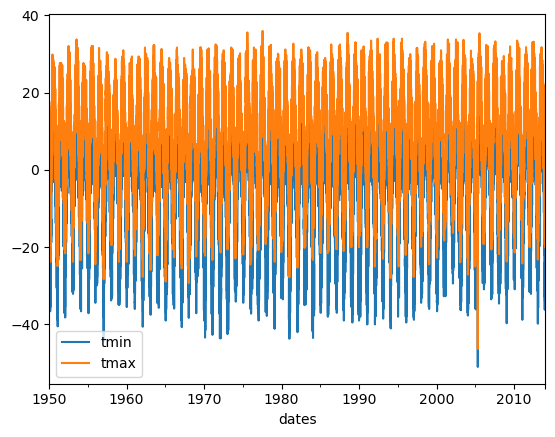

In [15]:
df_meteo[["tmin", "tmax"]].plot()

<Axes: xlabel='dates'>

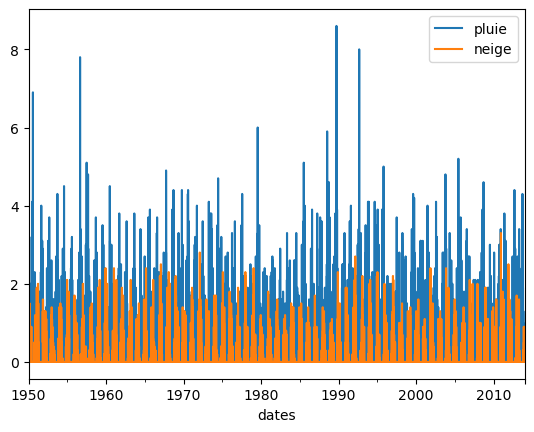

In [16]:
df_meteo[["pluie", "neige"]].plot()

## Parametres

In [17]:
with Path.open(Path(data_dir) / param_file) as f:
    param = f.readlines()

In [18]:
param[:10]

['Nom \t\t\t\tmin \t\tdefault \tmax\n',
 'efficacite_evapo_ete\t\t0.5 \t\t1.125\t\t1.75\n',
 'efficacite_evapo_hiver \t\t0 \t\t0.1 \t\t0.3\n',
 'taux_fonte_jour\t\t\t0.1\t\t0.135\t\t0.5\n',
 'taux_fonte_nuit\t\t\t0.05\t\t0.15\t\t0.3\n',
 'temp_fonte_jour\t\t\t-4\t\t0\t\t4\n',
 'temp_fonte_nuit\t\t\t-4\t\t0\t\t4\n',
 'temp_ref_pluie\t\t\t-2\t\t0\t\t2\n',
 'effet_redoux\t\t\t1.1 \t\t2.05 \t\t3\n',
 'effet_gel\t\t\t1\t\t5.5 \t\t10\n']

In [19]:
df_param = pd.read_csv(Path(data_dir) / param_file, header=0, sep=r"\s+", index_col=0)

In [20]:
df_param.head(10)

,min,default,max
Nom,,,
efficacite_evapo_ete,0.50,1.125,1.75
efficacite_evapo_hiver,0.00,0.100,0.30
taux_fonte_jour,0.10,0.135,0.50
taux_fonte_nuit,0.05,0.150,0.30
temp_fonte_jour,-4.00,0.000,4.00
temp_fonte_nuit,-4.00,0.000,4.00
temp_ref_pluie,-2.00,0.000,2.00
effet_redoux,1.10,2.050,3.00
effet_gel,1.00,5.500,10.00


## Projet

In [37]:
from hsamiplus.hsami2_noyau import hsami2_noyau

In [38]:
help(hsami2_noyau)

Help on function hsami2_noyau in module hsamiplus.hsami2_noyau:

hsami2_noyau(projet, etat)
    Noyau d'HSAMI pour simule UN SEUL PAS DE TEMPS.

    Parameters
    ----------
    projet : dict
        Dictionnaire contenant données d'entrée de HSAMI+.
    etat : dict
        États du bassin versants et du réservoir.

    Returns
    -------
    s : dict
        Sorties de simulation.
    etats: dict
        États du bassin versants et du réservoir.
    deltas: dict
        Composants du bilan massique.

    Notes
    -----
    La fonction constitue le noyau d'HSAMI et simule UN SEUL PAS DE TEMPS.
    Elle reçoit donc en entrée les états du pas de temps précédent.

    projet : un dictionnaire contenant les clés suivantes :
        - 'superficie' : superficie(1) : Superficie du bassin versant, incluant le réservoir (km^2, scalaire)
            superficie(2) : Superficie moyenne du réservoir (= 0 si non modélisé) (km^2, scalaire).
        - 'param' : liste des float, Paramètres pour la s

### Structure de projet.json

In [39]:
filename = "projet.json"

with Path.open(Path(data_dir) / filename) as file:
    projet = json.load(file)

In [40]:
projet.keys()

dict_keys(['id', 'modules', 'superficie', 'dates', 'meteo', 'physio', 'memoire', 'nb_pas_par_jour', 'param', 'hu_surface', 'hu_inter'])

In [41]:
projet["id"]

'947587'

#### Modules

In [44]:
projet["modules"]

{'etp_bassin': 'hsami',
 'etp_reservoir': 'hsami',
 'een': 'hsami',
 'radiation': 'hsami',
 'infiltration': 'hsami',
 'sol': 'hsami',
 'qbase': 'hsami',
 'mhumide': 1,
 'reservoir': 0,
 'glace_reservoir': 'stefan'}

### physio 

In [47]:
projet["physio"].keys()

dict_keys(['altitude', 'latitude', 'pente_bv', 'occupation', 'niveau', 'coeff', 'occupation_bande', 'altitude_bande', 'samax', 'albedo_sol'])

In [48]:
projet["physio"]["occupation"]

[0.083, 0.503, 0.414]

In [ ]:
projet["superficie"]

[2640, 438]

In [ ]:
projet["nb_pas_par_jour"]

1

#### Paramétres

In [49]:
projet["param"][:10]

[0.5, 0, 0.1, 0.05, -4, -4, -2, 1.1, 1, 5]

In [50]:
projet["meteo"]["bassin"][:10]

[[-15.3, -1.9, 0, 0, 0.5, -1],
 [-6.4, 1.2, 0.3, 0, 0.5, -1],
 [-1.8, 9.2, 0.7, 0, 0.5, -1],
 [0, 7.4, 0.1, 0.2, 0.5, -1],
 [-19.1, -13.2, 0, 0, 0.5, -1],
 [-17.8, -9.8, 0, 0, 0.5, -1],
 [-17, -10.3, 0, 0, 0.5, -1],
 [-30.1, -16.6, 0, 0.1, 0.5, -1],
 [-27.7, -7.2, 0, 0, 0.5, -1],
 [-16.2, 2.4, 0.3, 0, 0.5, -1]]

In [51]:
projet["dates"][:10]

[[1950, 1, 1, 0, 0, 0],
 [1950, 1, 2, 0, 0, 0],
 [1950, 1, 3, 0, 0, 0],
 [1950, 1, 4, 0, 0, 0],
 [1950, 1, 5, 0, 0, 0],
 [1950, 1, 6, 0, 0, 0],
 [1950, 1, 7, 0, 0, 0],
 [1950, 1, 8, 0, 0, 0],
 [1950, 1, 9, 0, 0, 0],
 [1950, 1, 10, 0, 0, 0]]

In [52]:
dates = pd.DatetimeIndex([pd.Timestamp(*dt) for dt in projet["dates"]])

### Créer le fichier projet.json

In [53]:
basin_file = "bassin_versant_info.txt"
param_file = "parametres.txt"
meteo_file = "meteo_file.csv"
projet_file = "projet_exemple.json"

In [54]:
make_project(data_dir, basin_file, param_file, projet_file)

NameError: name 'make_project' is not defined

In [ ]:
with Path.open(Path(data_dir) / projet_file) as file:
    projet_exemple = json.load(file)

In [ ]:
projet_exemple.keys()

dict_keys(['id', 'nb_pas_par_jour', 'memoire', 'superficie', 'modules', 'param', 'physio', 'meteo', 'dates'])

In [ ]:
projet_exemple["modules"]

{'een': 'dj',
 'etp_bassin': 'priestley_taylor',
 'etp_reservoir': 'priestley_taylor',
 'glace_reservoir': 'stefan',
 'infiltration': 'green_ampt',
 'mhumide': 1,
 'qbase': 'dingman',
 'radiation': ' mdj',
 'reservoir': 1,
 'sol': '3couches'}

In [ ]:
projet_exemple["meteo"]["bassin"][:10]

[[-15.3, -1.9, 0.0, 0.0, 0.5, -1.0],
 [-6.4, 1.2, 0.3, 0.0, 0.5, -1.0],
 [-1.8, 9.2, 0.7, 0.0, 0.5, -1.0],
 [0.0, 7.4, 0.1, 0.2, 0.5, -1.0],
 [-19.1, -13.2, 0.0, 0.0, 0.5, -1.0],
 [-17.8, -9.8, 0.0, 0.0, 0.5, -1.0],
 [-17.0, -10.3, 0.0, 0.0, 0.5, -1.0],
 [-30.1, -16.6, 0.0, 0.1, 0.5, -1.0],
 [-27.7, -7.2, 0.0, 0.0, 0.5, -1.0],
 [-16.2, 2.4, 0.3, 0.0, 0.5, -1.0]]